# Fish Market KNN (Nearest Neighbors)
Goal: use the technique of nearest neighbors to classify fish species based on measurements.  
The data for this notebook is sourced from https://www.kaggle.com/datasets/vipullrathod/fish-market/data, which is CC0 licensed.

First we start by importing some packages we'll use for manipulating data, doing math, visualizing data, and doing the nearest neighbors technique.

In [29]:
# math tools
import numpy as np
# data tools
import pandas as pd
# data visualization tools
import seaborn as sns

# graphing utilities
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# ability to split data randomly into training and testing
from sklearn.model_selection import train_test_split

# Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# If you're missing any of these, you'll have to use pip to install them. For example:
# pip install seaborn
# sklearn is a bit odd, the pip command for that one will be:
# pip install scikit-learn

Now we'll load some data. For this example we'll be using the fish market data set. It's a dataset of Fish, each of which has a species, a weight, a height, a width, and three slighlty different length measurements. The weight is in grams and all the other measurements are in centimeters.

In [30]:
import os

fish_data = pd.read_csv(os.path.join(os.getcwd(), "fish_market.csv"))
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Here's a way to look at all the variables in the dataset and see what their relationships are to one another. These are colored by species. We can see that all the length variables are basically the same. Notice it's pretty easy to tell that the pike are a different shape than the other species.

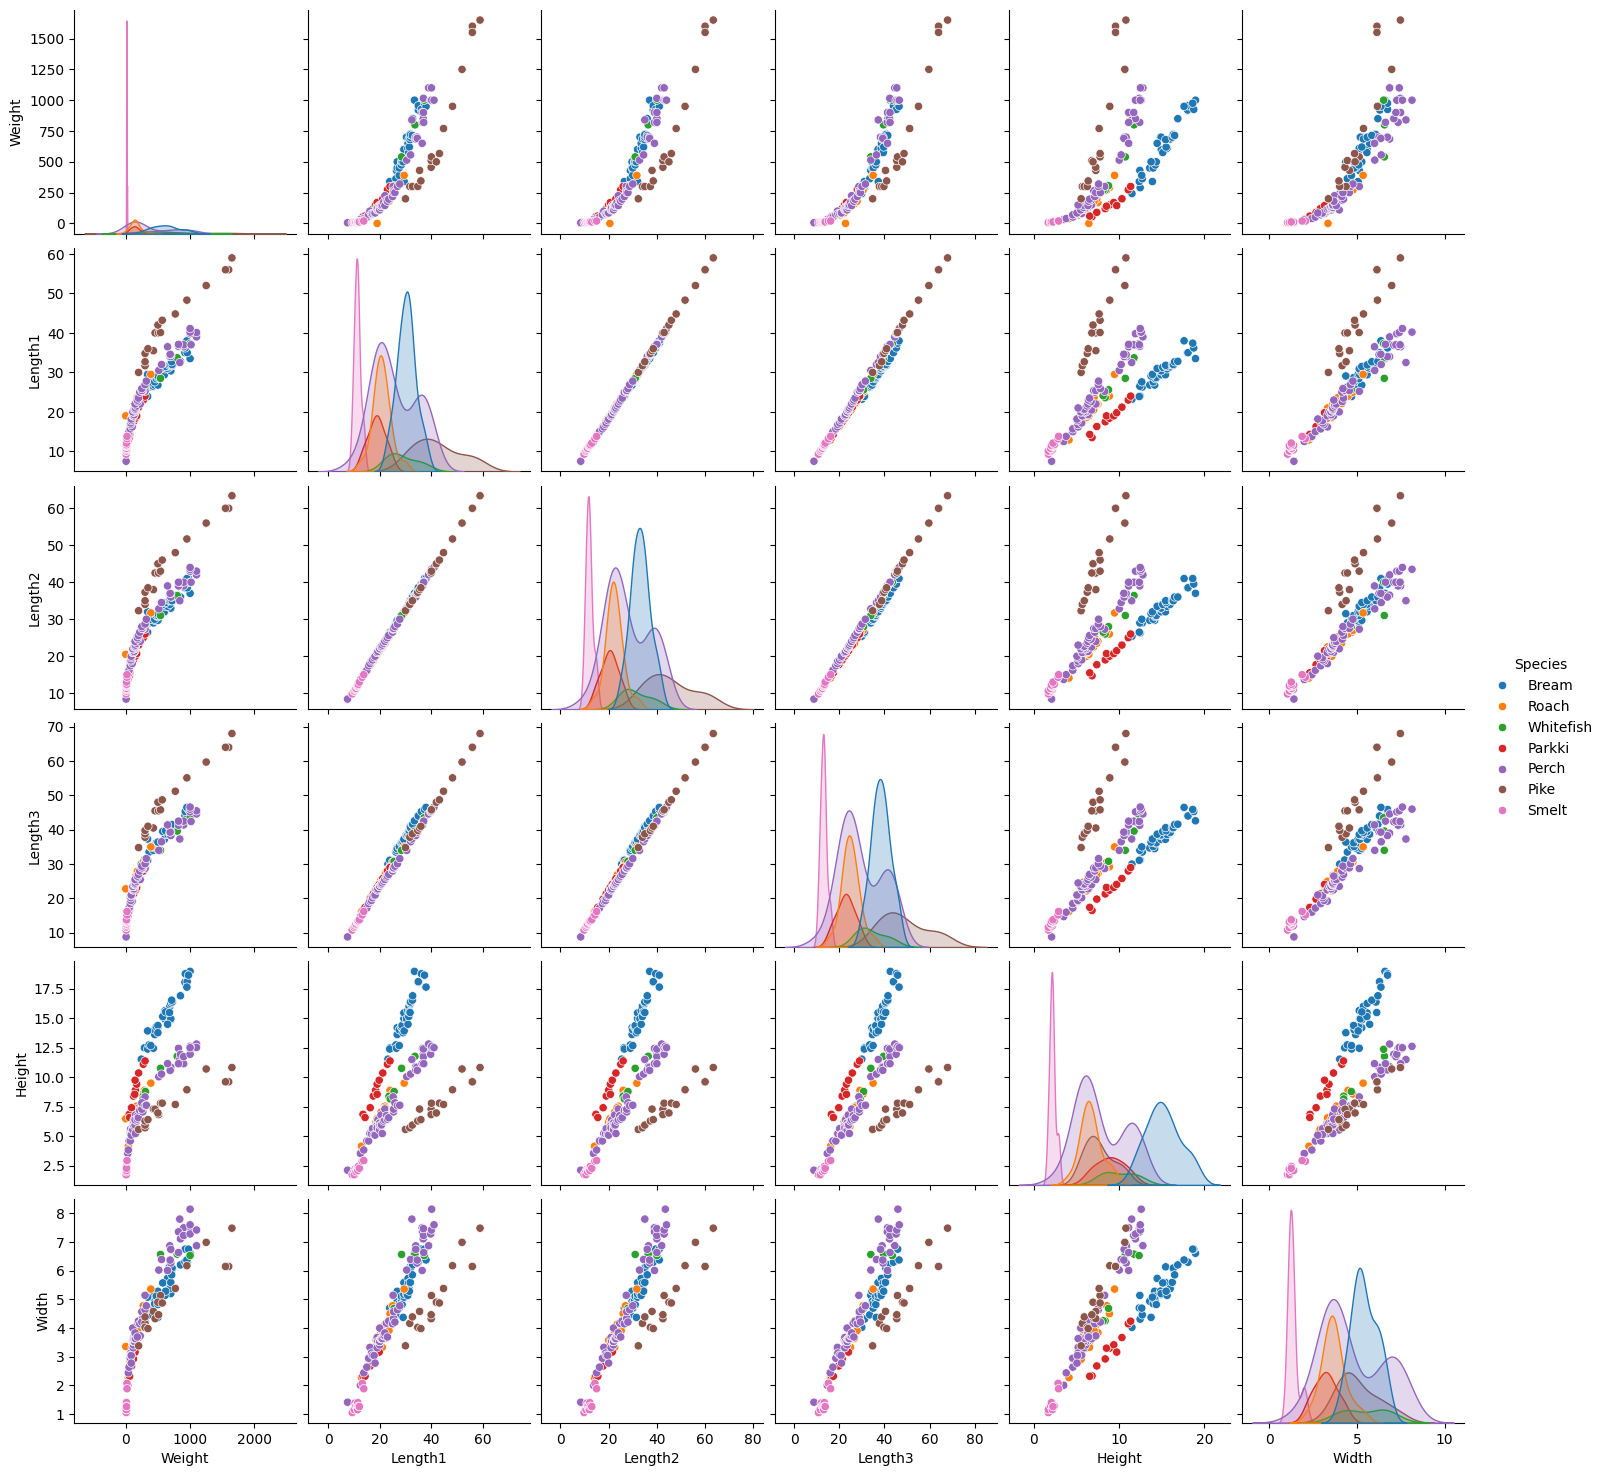

In [31]:
sns.pairplot(fish_data, hue="Species")

In this next cell we split the data down to a few species to make our analysis easier. Feel free to come back to this point and allow or disallow a different combination of species to see how the algorithm works differently with different species. For a start, we'll consider only Pike, Perch, and Bream.

In [32]:
# all the species are: ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
allowed_species = ['Bream', 'Perch', 'Pike']

# filter for allowed species
fish_data = fish_data[fish_data["Species"].isin(allowed_species)]

fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440


Let's look at our graphs again. If you're running this with Perch, Pike, and Bream you'll see that looking at the length1 and height will allow us to tell all the species apart pretty easily.

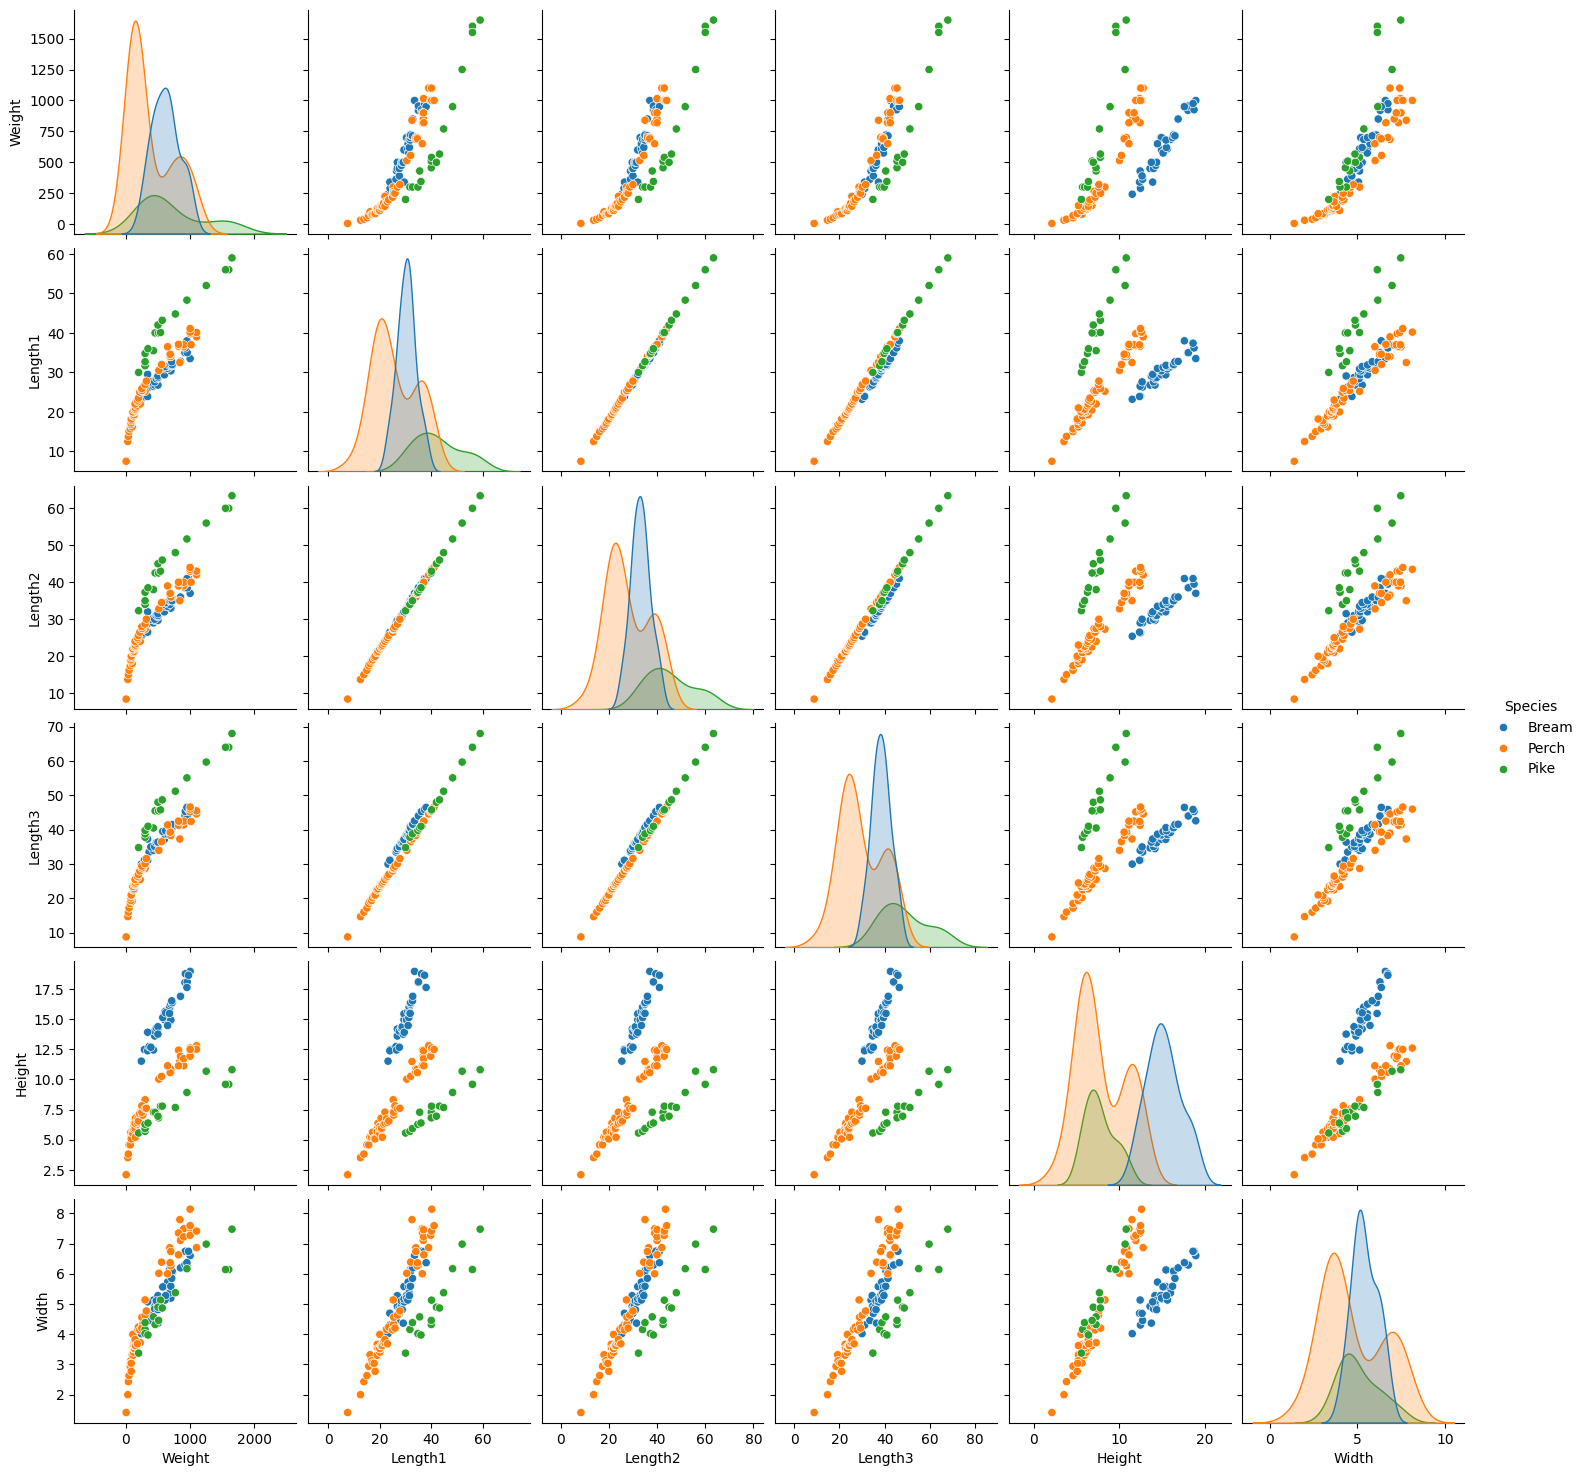

In [33]:
sns.pairplot(fish_data, hue="Species")

This will split our data into training data and testing data. Training data is the knwon fish and testing data is fish we pretend not to know the species of, use our model to predict the species, and then check if we got it correct. In a real world application, we'd probably train on all the data and test by gathering some new fish, but I can't find my fishing rod, so this will have to do. Note, this will be done differently everytime the cell is run, so you may have different results if you run the code again.

In [34]:
train_data, test_data = train_test_split(fish_data, test_size=0.2)

Here we'll take out the features and the targets from our testing and training data. Features are the things we're using to try to make predictions and targets are the things we're trying to predict.

In [42]:
# You can change this to try using different variables to predict.
chosen_features = ['Height', 'Length1']

features = np.array(train_data[chosen_features])
targets = np.array(train_data['Species'])

test_features = np.array(test_data[chosen_features])
test_targets = np.array(test_data['Species'])

Here we're creating a model and training it. In our case we're using the nearest 5 neighbors and majority wins. This means if the 5 nearest neighbors to an unkown fish are Pike, Pike, Pike, Perch, and Bream the model will predict that the fish is a Pike. The model can also be weighted by distance, which would count close neighbors more than further neighbors.

In [43]:
# other weights options include 'distance'
knn_model = KNeighborsClassifier(5, weights='uniform')

knn_model.fit(features, targets)

KNeighborsClassifier()

Let's see a graph of the two features we picked, colored by species.

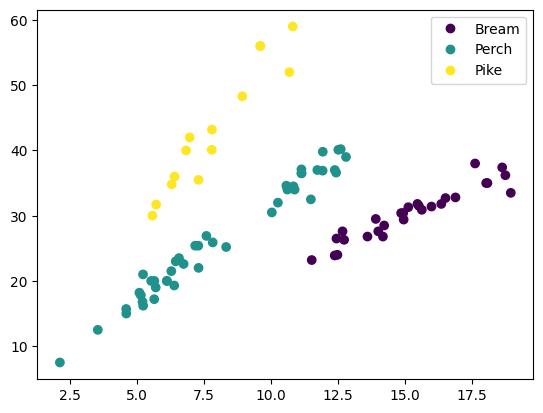

In [47]:
labels, index = np.unique(targets, return_inverse=True)

scatter = plt.scatter(features[:,0],features[:,1], c=index)
plt.legend(scatter.legend_elements()[0], labels)
plt.show()

Now, let's plot our testing and training fish together to see how our model will do. Training fish are round dots and testing fish are xs. Colors are by the actual species of the fish. 

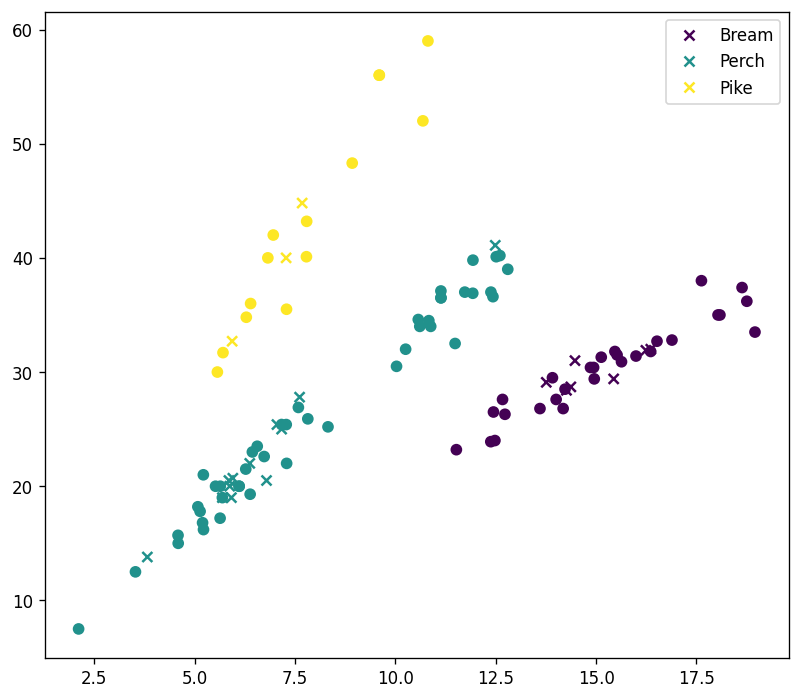

In [48]:
figure(figsize=(8, 7), dpi=120)

labels, index = np.unique(test_targets, return_inverse=True)
scatter = plt.scatter(test_features[:,0], test_features[:,1], marker = 'x', c=index)
plt.legend(scatter.legend_elements()[0], labels)

labels, index = np.unique(targets, return_inverse=True)
plt.scatter(features[:,0],features[:,1], c=index)

plt.show()

Now let's make some predicitons and check them. 

In [46]:
predictions = knn_model.predict(test_features)

correct =0
incorrect =0

for i in range(len(predictions)):
    print(f"Predicted {predictions[i]}, actually {test_targets[i]}.")
    if predictions[i] == test_targets[i]:
        correct +=1
        print("^Correct")
    else:
        incorrect +=1
        print("^Incorrect")
        
print(f"Got {correct} correct and {incorrect} incorrect.")
print(f"{100*correct/(correct+incorrect)} percent accuracy.")

Predicted Perch, actually Perch.
^Correct
Predicted Bream, actually Bream.
^Correct
Predicted Bream, actually Bream.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Pike, actually Pike.
^Correct
Predicted Bream, actually Bream.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Bream, actually Bream.
^Correct
Predicted Bream, actually Bream.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Pike, actually Pike.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Bream, actually Bream.
^Correct
Predicted Pike, actually Pike.
^Correct
Predicted Perch, actually Perch.
^Correct
Predicted Bream, actually Bream.
^Correct
Predicted Perch, actually Perch.
^Correct
Got 22 correct and 0 incorrect.
100.0 percent accuracy.


Now let's check our model's score using the test information. This should agree with the output from the cell above.

In [49]:
knn_model.score(test_features, test_targets)

1.0

If you got some wrong, you can look here and see what the model's second guess was.

In [41]:
knn_model.predict_proba(test_features)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

Feel free to go back through this and pick some different species or different variables for predicting. Most of them won't be as accurate as the example, which is maybe more interesting.